# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [3]:
# Your work here.

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

#### 1. Is the distribution of body temperatures normal?


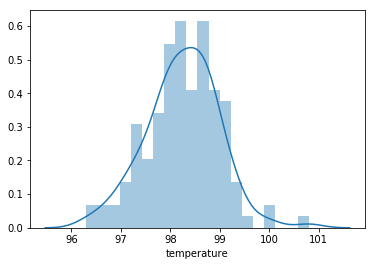

In [133]:
sns.distplot(df['temperature'], bins=20);

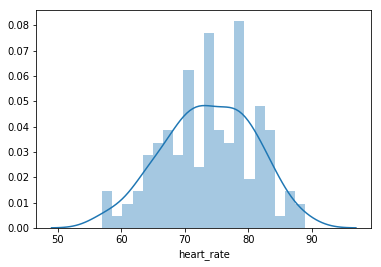

In [6]:
sns.distplot(df['heart_rate'], bins=20)

In [7]:
def ecdf(data):
    ''' takes the data and returns the x and y values where x is the sorted data and
    y is the cumulative proportion of the distribution of data. The result can be used for 
    plotting an empirical cumulative distribution function (ECDF).
    '''
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1)/n
    return x, y    

In [8]:
t1, t2 = ecdf(df['temperature'])
h1,h2 = ecdf(df['heart_rate'])

In [52]:
# define an array of percentiles
percentiles = np.array([2.5,25,50,75,97.5])

temp_percentile = np.percentile(df['temperature'], percentiles).round(1)
hr_percentile = np.percentile(df['heart_rate'],percentiles).round(1)

In [16]:
# get the µ and sd of the distribution to replicate the value in normal dist.
sd_temp = np.std(df['temperature'])
mu_temp = np.mean(df['temperature'])
sd_hr = np.std(df['heart_rate'])
mu_hr = np.mean(df['heart_rate'])

In [68]:
# create a normally distributed data based on the means and standard deviations 
# of the observed data. 
temp_normal = np.random.normal(mu_temp,sd_temp,len(df))
hr_normal = np.random.normal(mu_hr,sd_hr,len(df))

In [70]:
# create the x and y values of the theoretical (normal) distribution. 
t1_theor, t2_theor = ecdf(temp_normal)
h1_theor, h2_theor = ecdf(hr_normal)

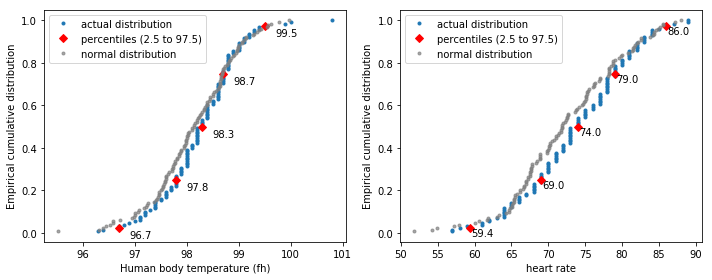

In [137]:
# plot the empirical cumulative distribution function, 
# actual percentiles (2.5, 25, 50, 75, 97.5) and the theoretical normal distribution 
# cumulative values. 
fig, [ax1, ax2] = plt.subplots(1,2,figsize=(10,4))
ax1.plot(t1,t2,marker='.', linestyle='none', label='actual distribution')
ax1.plot(temp_percentile,percentiles/100,marker='D',
         color='red', linestyle='none', label='percentiles (2.5 to 97.5)')
ax1.plot(t1_theor,t2_theor, marker='.', linestyle='none', 
         color='grey', label='normal distribution',alpha=0.7)
ax1.set_xlabel('Human body temperature (fh)')
ax1.set_ylabel('Empirical cumulative distribution');
ax1.legend()
for i,j in zip(temp_percentile,percentiles):
    ax1.annotate(str(i),xy=(i+0.2,j/100-0.05))
    
ax2.plot(h1,h2,marker='.', linestyle='none',label='actual distribution')
ax2.plot(hr_percentile,percentiles/100,marker='D', 
         color='red', linestyle='none', label='percentiles (2.5 to 97.5)')
ax2.plot(h1_theor,h2_theor, marker='.', linestyle='none', 
         color='grey',label='normal distribution', alpha=0.7)
for i,j in zip(hr_percentile,percentiles):
    ax2.annotate(str(i),xy=(i+0.2,j/100-0.04))

ax2.set_xlabel('heart rate')
ax2.set_ylabel('Empirical cumulative distribution');
ax2.legend()
plt.tight_layout()

#### Discussion
Data seem approximately normally distributed. However, both body temperature and the heart rate seem to be higher in the interquartile range from the theoretical normal distribution. THis means that the distribution's mean and st. deviation is somewhat influenced by the tail values.

**2. Is the sample size large? Are the observations independent?**
* Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.

#### Answer
* Since the data is about biological measurements, the underlying population data should be normally distributed. The sample size of 390 observations is large enough. 
* the observations are independent among the variables. but there might be some correlation between the body temperature and heart rate, so we cannot rule out dependence between these 2 variables.

***Ask Shmuel about this. Are they asking about the independence between heart rate and temperature or independence among the different observations?***

**2. Is the true population mean really 98.6 degrees F?**
* First, try a bootstrap hypothesis test. 
* Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why? 
* In this situation, is it appropriate to use the t or z statistic? 
* Now try using the other test. How is the result be different? Why?

In [139]:
# H0: the population mean is 98.6 degrees
# H1: the population mean is NOT 98.6 degrees. 
# construct a two-tail hypothesis test using bootstrapping. 

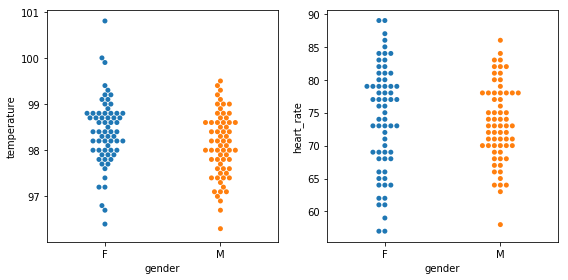

In [132]:
# swarmplot of the temperature and heart rate values based on gender.
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(8,4))
sns.swarmplot(x='gender',y='temperature', data=df, ax=ax1)
sns.swarmplot(x='gender', y='heart_rate', data=df, ax=ax2)
plt.tight_layout()

In [127]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


#### Discussion
* The above ecdf graph shows that the some 60% of all body temperature is between 98 and 99 degrees. 